<img src="Tarjeta.png">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Conectemonos-a-Google-Drive-y-preparemos-los-datos" data-toc-modified-id="1.-Conectemonos-a-Google-Drive-y-preparemos-los-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Conectemonos a Google Drive y preparemos los datos</a></span></li><li><span><a href="#2.-Librerias" data-toc-modified-id="2.-Librerias-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Librerias</a></span></li><li><span><a href="#3.-Definimos-algunas-constantes" data-toc-modified-id="3.-Definimos-algunas-constantes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. Definimos algunas constantes</a></span></li><li><span><a href="#4.-Preparamos-los-datos-de-entrenamiento" data-toc-modified-id="4.-Preparamos-los-datos-de-entrenamiento-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>4. Preparamos los datos de entrenamiento</a></span></li><li><span><a href="#5.-Exploremos-los-datos" data-toc-modified-id="5.-Exploremos-los-datos-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>5. Exploremos los datos</a></span></li><li><span><a href="#6.-Pintemos-una-imagen" data-toc-modified-id="6.-Pintemos-una-imagen-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>6. Pintemos una imagen</a></span></li><li><span><a href="#7.-Apilemos-bloques-para-hacer-el-modelo" data-toc-modified-id="7.-Apilemos-bloques-para-hacer-el-modelo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>7. Apilemos bloques para hacer el modelo</a></span></li><li><span><a href="#8.-Montemos-el-optimizador-compilando-el-modelo" data-toc-modified-id="8.-Montemos-el-optimizador-compilando-el-modelo-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>8. Montemos el optimizador compilando el modelo</a></span></li><li><span><a href="#9.-Definamos-un-callback-para-el-Early-Stopping" data-toc-modified-id="9.-Definamos-un-callback-para-el-Early-Stopping-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>9. Definamos un callback para el Early Stopping</a></span></li><li><span><a href="#10.-Preparamos-los-datos" data-toc-modified-id="10.-Preparamos-los-datos-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>10. Preparamos los datos</a></span></li><li><span><a href="#11.-Transformador-de-imagenes-a-datos-consumibles-por-la-red-neuronal" data-toc-modified-id="11.-Transformador-de-imagenes-a-datos-consumibles-por-la-red-neuronal-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>11. Transformador de imagenes a datos consumibles por la red neuronal</a></span></li><li><span><a href="#12.-Veamos-que-pinta-tiene-el-generador-de-datos" data-toc-modified-id="12.-Veamos-que-pinta-tiene-el-generador-de-datos-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>12. Veamos que pinta tiene el generador de datos</a></span></li><li><span><a href="#13.-Entrenemos-el-modelo!" data-toc-modified-id="13.-Entrenemos-el-modelo!-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>13. Entrenemos el modelo!</a></span></li><li><span><a href="#14.-Guardemos-el-modelo" data-toc-modified-id="14.-Guardemos-el-modelo-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>14. Guardemos el modelo</a></span></li><li><span><a href="#15.-Veamos-los-resultados" data-toc-modified-id="15.-Veamos-los-resultados-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>15. Veamos los resultados</a></span></li><li><span><a href="#16.-Pintemos-algunas-predicciones" data-toc-modified-id="16.-Pintemos-algunas-predicciones-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>16. Pintemos algunas predicciones</a></span></li></ul></div>

## 1. Conectemonos a Google Drive y preparemos los datos

Los datos los podeis encontrar en esta URL de Google Drive (formato NPZ)

https://drive.google.com/file/d/1-OplAg9THXuzKC_oYAiB4wdBmCTdiy4z/view?usp=sharing <br>
https://drive.google.com/file/d/1-Svi93L-C7qAq2oJmtajfCJDjGdJTIaE/view?usp=sharing <br>
https://drive.google.com/file/d/1-Dpozh1KCEvuCYgYuaf98-PzHhHTo3F_/view?usp=sharing <br>

Movedlos a vuestro Drive!!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Librerias

Para empezar carguemos esas librerias que nos hacen falta

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import os

from tensorflow import keras as ks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


## 3. Definimos algunas constantes

In [3]:
ANCHO_IMAGEN=150
ALTURA_IMAGEN=150
IMAGE_SIZE=(ANCHO_IMAGEN, ALTURA_IMAGEN)
CANALES_IMAGENES=3

# Definimos la ruta donde teneis los archivos NPZ dentro de Google Drive
ruta = "/content/drive/MyDrive/Nuclio/materiales/datasets/cats_dogs/"

## 4. Preparamos los datos de entrenamiento

Los cargaremos del formato NPZ que comentamos en la última clase, y que tenemos en el Drive



In [4]:
dict_npz = np.load(ruta+'xy_train_img.npz')
x_train_img = dict_npz['x']
y_train_img = dict_npz['y']

dict_npz = np.load(ruta+'xy_test_img.npz')
x_test_img = dict_npz['x']
y_test_img = dict_npz['y']

dict_npz = np.load(ruta+'xy_val_img.npz')
x_val_img = dict_npz['x']
y_val_img = dict_npz['y']

x_train_scaled = x_train_img / 255.
x_test_scaled = x_test_img / 255.
x_val_scaled = x_val_img / 255.

In [5]:
print("Tamaño X train:", x_train_scaled.shape)
print("Tamaño Y train:", y_train_img.shape)

print("Tamaño X test:", x_test_scaled.shape)
print("Tamaño Y test:", y_test_img.shape)

print("Tamaño X val:", x_val_scaled.shape)
print("Tamaño Y val:", y_val_img.shape)



Tamaño X train: (5000, 150, 150, 3)
Tamaño Y train: (5000,)
Tamaño X test: (1000, 150, 150, 3)
Tamaño Y test: (1000,)
Tamaño X val: (1000, 150, 150, 3)
Tamaño Y val: (1000,)


## 5. Exploremos los datos

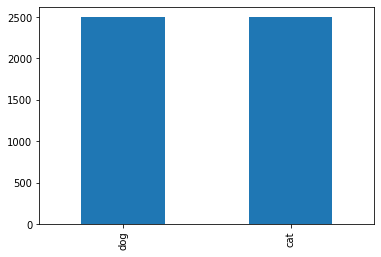

In [6]:
df_train = pd.DataFrame(y_train_img, columns=['category'])
df_train['category'].value_counts().plot.bar()

Como podemos ver tenemos 2500 ejemplos de cada clase... poquito para ser una red neuronal para vision por computador... ya vereis...

## 6. Pintemos una imagen

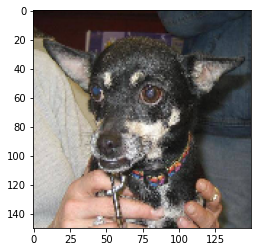

In [8]:
sample = random.choice(range(0,4999))
image = x_train_scaled[sample]
plt.imshow(image, cmap=plt.cm.binary)

## 7. Apilemos bloques para hacer el modelo

<img src="https://i.imgur.com/ebkMGGu.jpg" width="100%"/>

In [9]:
model = ks.Sequential()

model.add(ks.layers.Conv2D(16, (3, 3), activation='relu', 
                           input_shape=(ANCHO_IMAGEN, ALTURA_IMAGEN, CANALES_IMAGENES)))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(ks.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(ks.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(512, activation='relu'))
model.add(ks.layers.Dropout(0.3))
model.add(ks.layers.Dense(512, activation='relu'))
model.add(ks.layers.Dropout(0.3))
model.add(ks.layers.Dense(1, activation='sigmoid')) # 1 de salida porque tenemos dos valores posibles 0 o 1 (tras aplicar un label encoder a dog y cat)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## 8. Montemos el optimizador compilando el modelo


In [10]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

## 9. Definamos un callback para el Early Stopping

**Early Stopping**

Prevenimos el sobre ajuste parando cuando tras 10 epochs y el error de la validacion no decrementa (estamos en una plateau)

In [11]:
callback_val_loss = EarlyStopping(monitor="val_loss", patience=5)
callback_val_accuracy = EarlyStopping(monitor="val_accuracy", patience=10)

## 10. Preparamos los datos

Haremos un one-hote encoding que nos va a ir bien para nuestra clasificación

In [7]:
y_train_img

array(['cat', 'cat', 'cat', ..., 'dog', 'dog', 'dog'], dtype='<U3')

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train_img)
y_train_encoded = le.transform(y_train_img)
y_val_encoded = le.transform(y_val_img)
y_test_encoded = le.transform(y_test_img)

In [12]:
le_mapeo = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_mapeo)

{'cat': 0, 'dog': 1}


In [14]:
y_train_encoded

array([0, 0, 0, ..., 1, 1, 1])

## 11. Transformador de imagenes a datos consumibles por la red neuronal

**De entrenamiento**

Aquí incluiremos nuestra parte de generación de imagenes (con código de partida)

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    )

train_generator = train_datagen.flow(
    x_train_img,  # Aquí hay que usar datos NO re-escalados... de ahi que no usemos x_train_rescaled!
    y_train_encoded, 
    batch_size=30
)

**De validacion (test no lo necesita)**

Fijaos que aquí la única modificación es un re-escalado, nada de modificaciones

In [16]:
validation_datagen = ImageDataGenerator(
    rescale=1./255
    )
validation_generator = validation_datagen.flow(
    x_val_img, 
    y_val_encoded, 
    batch_size=20
)


No tiene mala pinta!!

## 12. Veamos que pinta tiene el generador de datos

A rellenar para ver que nos da el generador de imagenes nuevas

## 13. Entrenemos el modelo!

In [17]:
epochs = 200

history = model.fit(x_train_scaled, y_train_encoded, epochs=epochs, 
                    validation_data=(x_val_scaled, y_val_encoded), batch_size=512, 
                    callbacks=[callback_val_loss, callback_val_accuracy])

Epoch 1/200
10/10 [==============================] - 46s 1s/step - loss: 0.7388 - accuracy: 0.5118 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/200
10/10 [==============================] - 4s 369ms/step - loss: 0.6898 - accuracy: 0.5270 - val_loss: 0.6828 - val_accuracy: 0.5170
Epoch 3/200
10/10 [==============================] - 4s 370ms/step - loss: 0.6671 - accuracy: 0.5742 - val_loss: 0.6577 - val_accuracy: 0.5990
Epoch 4/200
10/10 [==============================] - 4s 368ms/step - loss: 0.6625 - accuracy: 0.6082 - val_loss: 0.6756 - val_accuracy: 0.5780
Epoch 5/200
10/10 [==============================] - 4s 369ms/step - loss: 0.6519 - accuracy: 0.6150 - val_loss: 0.6512 - val_accuracy: 0.6350
Epoch 6/200
10/10 [==============================] - 4s 369ms/step - loss: 0.6310 - accuracy: 0.6466 - val_loss: 0.6179 - val_accuracy: 0.6480
Epoch 7/200
10/10 [==============================] - 4s 374ms/step - loss: 0.5981 - accuracy: 0.6730 - val_loss: 0.5920 - val_accuracy: 0.6710
E

## 14. Guardemos el modelo

In [ ]:
model.save(ruta+"model_basico.h5")

## 15. Veamos los resultados

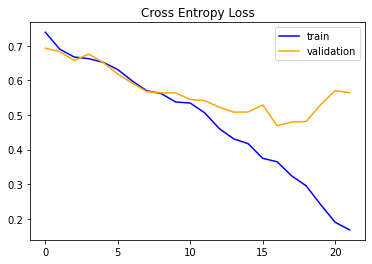

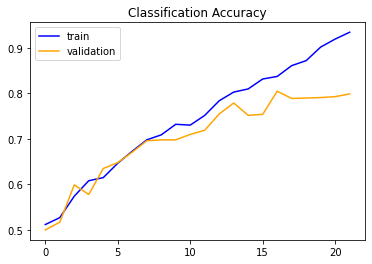

In [18]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.legend()
plt.show()

In [19]:
_, acc = model.evaluate(x_test_scaled, y_test_encoded, verbose=0)
print('Test del Modelo sin Data Augmentation > %.3f' % (acc * 100.0))

Test del Modelo sin Data Augmentation > 80.600


## 16. Pintemos algunas predicciones

In [ ]:
predictions = model.predict(x_test_scaled) 


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  if true_label == 1:
    true_label = 'dog'
  else:
    true_label = 'cat'

  if np.max(predictions_array) > 0.50:
    predicted_label = 'dog'
  else:
    predicted_label = 'cat'

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(1))
  plt.yticks([])

  if true_label == 1:
    true_label = 'dog'
  else:
    true_label = 'cat'

  if np.max(predictions_array) > 0.50:
    predicted_label = 'dog'
  else:
    predicted_label = 'cat'

  if predicted_label == true_label:
    color_plt = 'blue'
  else:
    color_plt = 'red'

  thisplot = plt.bar(range(1), np.max(predictions_array), color=color_plt)
  plt.ylim([0, 1])


Dibujamos los primeros digitos, con las predicciones y sus valores reales (un total de 20 imagenes, para no abusar de vuestros laptops)

Coloreamos las prediciones correctas en azul y los fallos en rojo

In [ ]:
num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i+start, predictions[i+start], y_test_encoded, x_test_scaled)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i+start, predictions[i+start], y_test_encoded)
plt.tight_layout()
plt.show()